In [1]:
import pandas as pd
import pandas as pd
from darts import TimeSeries
from darts.metrics.metrics import rmse
from darts.dataprocessing.transformers import Scaler

In [2]:
actuals = pd.read_excel('../data/filtered_actuals.xlsx')


In [3]:
broker_target = pd.read_excel('../data/filtered_broker_target_filledna.xlsx')

In [5]:
actuals

,FiscalYear,"Armstrong, Brooke","Breen, Daniel","Cosby, Russell","Curry, Ashley","Darrow, Terry","Eckert, Jeff","Esquivel, James","Forkner, Fiona","Haggar, James",...,"Selner, Bradley","Sheehy, Ahnie","Shipley, Christopher","Smith, Jubal","Stout, Christopher","Taguwa, Andrew","Toon, Larry","Weatherby, Samuel","Whitman, Paul","Wood, Alan"
0,2014,1380583.55,171398.16,770342.33,88839.39,1003383.83,750000.05,750000.01,384698.30,301113.55,...,3188933.63,151.72,356160.84,1771504.76,102575.75,901100.59,2259899.50,637791.99,1562838.05,856670.45
1,2015,631544.09,2194829.40,463416.90,335981.55,815760.82,997785.67,997785.62,998910.44,525300.89,...,2209823.93,142877.89,633904.48,7359378.40,250876.09,1011467.41,983978.26,1043269.72,1997295.13,786498.94
2,2016,1125976.16,1492879.42,1897362.90,401767.00,360931.29,995381.26,990905.52,1301178.85,641300.49,...,2076925.86,218536.00,808734.66,2113433.76,439799.56,714371.11,68855.76,576363.95,1207541.71,608604.08
3,2017,1526556.11,2425068.14,216952.35,267907.45,588227.17,812467.24,807640.25,665690.49,533198.91,...,2135517.42,333502.62,1325188.67,1495679.59,439281.72,998930.30,7801514.26,683077.75,363890.00,626262.49
4,2018,1786851.61,1557403.06,1035997.29,506123.66,429284.82,939797.56,939452.24,701267.31,540839.62,...,837927.59,394708.13,1221506.39,1477429.31,439691.67,1171395.37,543049.64,1662274.72,947842.79,433940.03
5,2019,2927638.63,1966813.19,2630950.86,393480.17,500000.00,610360.97,610355.66,589002.22,776827.65,...,3435213.05,500000.00,875584.42,9027557.98,837256.10,500000.00,563242.34,542493.41,798450.78,676387.34
6,2020,2774229.05,694513.79,85726.02,226290.45,69027.42,555576.34,555576.49,585002.05,765932.58,...,5020462.00,303459.66,1030727.50,1858116.40,729262.65,826222.42,204838.14,128476.25,1288304.98,92353.73
7,2021,1521039.35,1176575.40,1734397.73,529705.03,890021.64,1162108.21,1121160.16,334546.52,293815.62,...,3908492.32,217530.65,1382872.15,4769175.02,888623.37,650988.56,3920452.28,513034.18,1154146.70,273606.92
8,2022,138760.99,243170.51,262885.16,557611.48,240795.18,1101099.99,1071926.24,750000.00,1310808.71,...,4545074.40,488972.28,3319633.14,584342.95,900358.85,1277070.87,26433.64,559862.94,363262.31,500000.00
9,2023,-10737.07,427007.70,15142.76,592223.29,9041.67,986421.71,846948.54,1319272.27,2250000.00,...,2703434.77,126778.85,1530226.11,758521.60,1331616.06,1417720.02,26137.89,1128375.68,334568.10,180236.10


In [4]:
broker_target

,FiscalYear,"Armstrong, Brooke","Breen, Daniel","Cosby, Russell","Curry, Ashley","Darrow, Terry","Eckert, Jeff","Esquivel, James","Forkner, Fiona","Haggar, James",...,"Selner, Bradley","Sheehy, Ahnie","Shipley, Christopher","Smith, Jubal","Stout, Christopher","Taguwa, Andrew","Toon, Larry","Weatherby, Samuel","Whitman, Paul","Wood, Alan"
0,2014,1.200000e+06,5.000000e+05,1.000000e+06,0.000000e+00,2.100000e+06,1.400000e+06,1.400000e+06,1.300000e+06,3.500000e+05,...,1.750000e+06,0.000000e+00,4.000000e+05,1.200000e+06,2.000000e+05,7.500000e+05,1.500000e+06,5.000000e+05,1.500000e+06,6.000000e+05
1,2015,1.250000e+06,5.000000e+05,2.000000e+06,1.500000e+05,1.600000e+06,1.600000e+06,1.600000e+06,1.500000e+06,1.200000e+06,...,2.500000e+06,7.500000e+04,4.000000e+05,2.500000e+06,2.500000e+05,8.550000e+05,1.500000e+06,6.000000e+05,1.500000e+06,7.500000e+05
2,2016,1.000000e+06,1.500000e+06,1.500000e+06,4.000000e+05,1.400000e+06,7.000000e+05,7.000000e+05,9.666670e+05,6.000000e+05,...,2.200000e+06,1.600000e+05,5.000000e+05,3.000000e+06,5.000000e+05,9.666670e+05,1.500000e+06,1.633334e+06,1.500000e+06,8.000000e+05
3,2017,7.500000e+05,1.379000e+06,1.000000e+06,4.000000e+05,4.000000e+05,8.000000e+05,8.000000e+05,7.500000e+05,1.500000e+06,...,2.000000e+06,2.000000e+05,7.500000e+05,1.500000e+06,4.000000e+05,7.500000e+05,8.650000e+06,6.000000e+05,1.000000e+06,8.000000e+05
4,2018,1.250000e+06,2.218667e+06,1.000000e+06,4.000000e+05,7.000000e+05,2.400000e+06,2.400000e+06,2.250000e+06,1.000000e+06,...,1.750000e+06,2.000000e+05,1.800000e+06,2.218666e+06,1.200000e+06,1.000000e+06,2.000000e+06,8.500000e+05,3.000000e+06,2.400000e+06
5,2019,1.797766e+06,1.977076e+06,1.515785e+06,4.450111e+05,7.050786e+05,1.501899e+06,2.555989e+06,2.119291e+06,1.417596e+06,...,1.808278e+06,1.751064e+05,1.351294e+06,2.574303e+06,6.214291e+05,1.108331e+06,5.171692e+06,4.640914e+05,1.229895e+06,1.685388e+06
6,2020,2.500000e+06,2.347287e+06,2.000000e+06,3.514417e+05,8.218090e+05,7.387744e+05,1.489310e+06,1.800000e+06,1.232599e+06,...,2.500000e+06,1.438106e+05,1.642270e+06,2.405552e+06,1.397253e+06,2.000000e+06,6.000000e+05,5.500000e+05,8.000000e+05,8.000000e+05
7,2021,2.122976e+06,2.188235e+06,1.713554e+06,1.500000e+06,8.277283e+05,1.580360e+06,7.000000e+05,1.735445e+06,1.382997e+06,...,2.770005e+06,5.000000e+05,2.000000e+06,1.564799e+06,8.762097e+05,2.161284e+06,2.934364e+06,5.351797e+05,1.899507e+06,2.567850e+06
8,2022,1.633932e+06,1.290000e+06,1.241154e+06,1.090000e+06,3.150000e+05,1.630000e+06,1.630000e+06,2.168313e+06,1.250000e+06,...,2.728648e+06,9.000000e+05,1.265000e+06,1.540000e+06,1.260000e+06,2.010360e+06,2.911698e+06,5.808094e+05,1.636898e+06,1.696021e+06
9,2023,1.697376e+06,1.540000e+06,1.229080e+06,1.360000e+06,4.605749e+05,1.020000e+06,2.040000e+06,1.910000e+06,1.322577e+06,...,2.550000e+06,1.267266e+06,1.575000e+06,2.160000e+06,8.151310e+05,9.550000e+05,6.400000e+05,9.550000e+05,9.550000e+05,9.550000e+05


In [4]:
actuals_series = TimeSeries.from_dataframe(actuals, time_col="FiscalYear")
broker_target_series = TimeSeries.from_dataframe(broker_target, time_col="FiscalYear")

<Axes: xlabel='FiscalYear'>

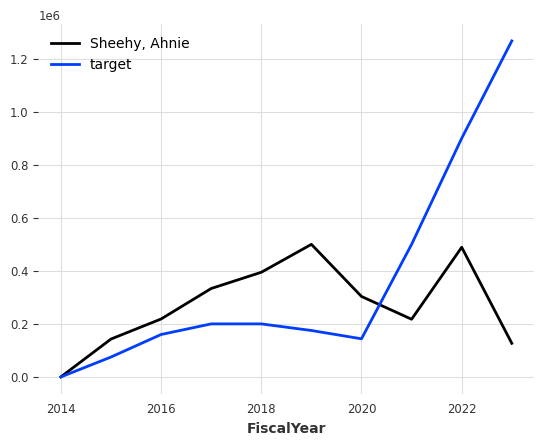

In [5]:
import random

name = random.choices(actuals.columns[1:])
actuals_series[name].plot()
broker_target_series[name].plot(label='target')

In [7]:
deficit_value = pd.read_excel('../data/adjusted_values.xlsx')

In [10]:
deficit_value.set_index('FiscalYear',inplace=True)
deficit_value['Avg Shortfall'] = deficit_value.apply(lambda x: x.mean(), axis=1)

In [27]:
individual_broker = deficit_value.apply(lambda x: x.mean())

In [34]:
individual_broker

index                   4.500000e+00
FiscalYear              2.018500e+03
Armstrong, Brooke      -1.399608e+05
Breen, Daniel          -3.090607e+05
Cosby, Russell         -5.086398e+05
Curry, Ashley          -2.196523e+05
Darrow, Terry          -4.423717e+05
Eckert, Jeff           -4.460034e+05
Esquivel, James        -6.623548e+05
Forkner, Fiona         -8.870148e+05
Haggar, James          -3.316631e+05
Halstedt, Lauren       -6.130988e+04
Holcomb, Curtis        -4.601053e+05
Holland, Melissa        1.237221e+05
Hoobler, Howard         1.088983e+03
Hull, Calvin           -8.719428e+04
Jones, Elizabeth       -1.168676e+05
Kackley, Kelley        -6.669809e+05
Leatherman, Andrew      2.675861e+05
Littlejohn, Torrey      7.525025e+04
McCarthy, Conor        -1.072132e+06
McCarthy, Thomas       -3.338034e+05
McGown, Jeremy         -3.225880e+05
McNeil, Jon            -7.318207e+04
Mullin, Daryl          -6.037218e+05
Selner, Bradley         7.504873e+05
Sheehy, Ahnie          -8.946650e+04
S

In [35]:
import plotly.graph_objects as go


In [43]:
individual_shortfall_yoy = go.Figure()
individual_shortfall_yoy.add_trace(go.Scatter(x=individual_broker.index, y=individual_broker.values, mode='lines', line_color = 'blue', name='Average Shortfall of Individual Broker'))

In [45]:
individual_broker.drop('Avg Shortfall')

index                   4.500000e+00
FiscalYear              2.018500e+03
Armstrong, Brooke      -1.399608e+05
Breen, Daniel          -3.090607e+05
Cosby, Russell         -5.086398e+05
Curry, Ashley          -2.196523e+05
Darrow, Terry          -4.423717e+05
Eckert, Jeff           -4.460034e+05
Esquivel, James        -6.623548e+05
Forkner, Fiona         -8.870148e+05
Haggar, James          -3.316631e+05
Halstedt, Lauren       -6.130988e+04
Holcomb, Curtis        -4.601053e+05
Holland, Melissa        1.237221e+05
Hoobler, Howard         1.088983e+03
Hull, Calvin           -8.719428e+04
Jones, Elizabeth       -1.168676e+05
Kackley, Kelley        -6.669809e+05
Leatherman, Andrew      2.675861e+05
Littlejohn, Torrey      7.525025e+04
McCarthy, Conor        -1.072132e+06
McCarthy, Thomas       -3.338034e+05
McGown, Jeremy         -3.225880e+05
McNeil, Jon            -7.318207e+04
Mullin, Daryl          -6.037218e+05
Selner, Bradley         7.504873e+05
Sheehy, Ahnie          -8.946650e+04
S

In [42]:
import plotly.graph_objects as go

individual_shortfall_yoy = go.Figure()
individual_shortfall_yoy.add_trace(go.Bar(
    x=individual_broker.index, 
    y=individual_broker.values, 
    marker_color='blue', 
    name='Average Shortfall YoY'
))

individual_shortfall_yoy.update_layout(
    template='plotly_dark',  # Using the 'plotly_dark' theme
    title='Average Shortfall YoY',
    xaxis_title='Year',
    yaxis_title='Shortfall',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Transparent paper background
)


In [21]:
deficit_value['Avg Shortfall'] = deficit_value.apply(lambda x: x.mean(), axis=1)

In [22]:
deficit_value.reset_index(inplace=True)

In [25]:
ts = TimeSeries.from_dataframe(deficit_value, value_cols=['Avg Shortfall'], time_col='FiscalYear')

<Axes: xlabel='FiscalYear'>

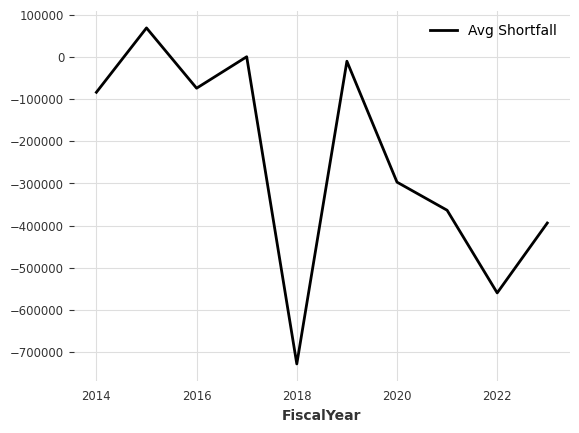

In [26]:
ts.plot()

In [17]:
deficit_value

,FiscalYear,"Armstrong, Brooke","Breen, Daniel","Cosby, Russell","Curry, Ashley","Darrow, Terry","Eckert, Jeff","Esquivel, James","Forkner, Fiona","Haggar, James",...,"Sheehy, Ahnie","Shipley, Christopher","Smith, Jubal","Stout, Christopher","Taguwa, Andrew","Toon, Larry","Weatherby, Samuel","Whitman, Paul","Wood, Alan",Overall Deficit
0,2014,1.805835e+05,-3.286018e+05,-2.296577e+05,88839.390000,-1.096616e+06,-6.499999e+05,-6.500000e+05,-9.153017e+05,-4.888645e+04,...,1.517200e+02,-4.383916e+04,5.715048e+05,-97424.250000,1.511006e+05,7.598995e+05,1.377920e+05,6.283805e+04,2.566705e+05,-86038.953333
1,2015,-6.184559e+05,1.694829e+06,-1.536583e+06,185981.550000,-7.842392e+05,-6.022143e+05,-6.022144e+05,-5.010896e+05,-6.746991e+05,...,6.787789e+04,2.339045e+05,4.859378e+06,876.090000,1.564674e+05,-5.160217e+05,4.432697e+05,4.972951e+05,3.649894e+04,71212.654545
2,2016,1.259762e+05,-7.120580e+03,3.973629e+05,1767.000000,-1.039069e+06,2.953813e+05,2.909055e+05,3.345119e+05,4.130049e+04,...,5.853600e+04,3.087347e+05,-8.865662e+05,-60200.440000,-2.522959e+05,-1.431144e+06,-1.056970e+06,-2.924583e+05,-1.913959e+05,-76058.169697
3,2017,7.765561e+05,1.046068e+06,-7.830477e+05,-132092.550000,1.882272e+05,1.246724e+04,7.640250e+03,-8.430951e+04,-9.668011e+05,...,1.335026e+05,5.751887e+05,-4.320410e+03,39281.720000,2.489303e+05,-8.484857e+05,8.307775e+04,-6.361100e+05,-1.737375e+05,785.722424
4,2018,5.368516e+05,-6.612636e+05,3.599729e+04,106123.660000,-2.707152e+05,-1.460202e+06,-1.460548e+06,-1.548733e+06,-4.591604e+05,...,1.947081e+05,-5.784936e+05,-7.412367e+05,-760308.330000,1.713954e+05,-1.456950e+06,8.122747e+05,-2.052157e+06,-1.966060e+06,-749724.356898
5,2019,1.129872e+06,-1.026318e+04,1.115166e+06,-51530.939703,-2.050786e+05,-8.915379e+05,-1.945633e+06,-1.530289e+06,-6.407682e+05,...,3.248936e+05,-4.757091e+05,6.453255e+06,215826.965383,-6.083308e+05,-4.608450e+06,7.840206e+04,-4.314439e+05,-1.009001e+06,-10206.083932
6,2020,2.742290e+05,-1.652773e+06,-1.914274e+06,-125151.279956,-7.527816e+05,-1.831980e+05,-9.337331e+05,-1.214998e+06,-4.666669e+05,...,1.596490e+05,-6.115426e+05,-5.474355e+05,-667990.228887,-1.173778e+06,-3.951619e+05,-4.215238e+05,4.883050e+05,-7.076463e+05,-305551.713881
7,2021,-6.019366e+05,-1.011660e+06,2.084408e+04,-970294.970000,6.229331e+04,-4.182520e+05,4.211602e+05,-1.400899e+06,-1.089182e+06,...,-2.824693e+05,-6.171279e+05,3.204376e+06,12413.672974,-1.510295e+06,9.860882e+05,-2.214554e+04,-7.453600e+05,-2.294243e+06,-374241.204459
8,2022,-1.495171e+06,-1.046829e+06,-9.782690e+05,-532388.520000,-7.420482e+04,-5.289000e+05,-5.580738e+05,-1.418313e+06,6.080871e+04,...,-4.110277e+05,2.054633e+06,-9.556571e+05,-359641.150000,-7.332888e+05,-2.885264e+06,-2.094642e+04,-1.273635e+06,-1.196021e+06,-576216.682173
9,2023,-1.708113e+06,-1.112992e+06,-1.213937e+06,-767776.710000,-4.515333e+05,-3.357829e+04,-1.193051e+06,-5.907277e+05,9.274231e+05,...,-1.140487e+06,-4.477389e+04,-1.401478e+06,516485.020421,4.627200e+05,-6.138621e+05,1.733757e+05,-6.204319e+05,-7.747639e+05,-405483.805767


In [6]:
test = actuals_series[name]

In [37]:
test[0].pd_series().values[0]

2559682.35

In [34]:
a.values[0]

2559682.35

In [7]:
test.append_values([123456])

<TimeSeries (DataArray) (FiscalYear: 11, component: 1, sample: 1)> Size: 88B
array([[[2559682.35]],

       [[1684487.28]],

       [[2101767.07]],

       [[1360919.25]],

       [[2738122.29]],

       [[2244909.46]],

       [[1837476.8 ]],

       [[1699617.73]],

       [[1736420.59]],

       [[1635795.06]],

       [[ 123456.  ]]])
Coordinates:
  * FiscalYear  (FiscalYear) int64 88B 2014 2015 2016 2017 ... 2022 2023 2024
  * component   (component) object 8B 'Kackley, Kelley'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [8]:
actuals

,FiscalYear,"Armstrong, Brooke","Breen, Daniel","Cosby, Russell","Curry, Ashley","Darrow, Terry","Eckert, Jeff","Esquivel, James","Forkner, Fiona","Haggar, James",...,"Selner, Bradley","Sheehy, Ahnie","Shipley, Christopher","Smith, Jubal","Stout, Christopher","Taguwa, Andrew","Toon, Larry","Weatherby, Samuel","Whitman, Paul","Wood, Alan"
0,2014,1380583.55,171398.16,770342.33,88839.39,1003383.83,750000.05,750000.01,384698.30,301113.55,...,3188933.63,151.72,356160.84,1771504.76,102575.75,901100.59,2259899.50,637791.99,1562838.05,856670.45
1,2015,631544.09,2194829.40,463416.90,335981.55,815760.82,997785.67,997785.62,998910.44,525300.89,...,2209823.93,142877.89,633904.48,7359378.40,250876.09,1011467.41,983978.26,1043269.72,1997295.13,786498.94
2,2016,1125976.16,1492879.42,1897362.90,401767.00,360931.29,995381.26,990905.52,1301178.85,641300.49,...,2076925.86,218536.00,808734.66,2113433.76,439799.56,714371.11,68855.76,576363.95,1207541.71,608604.08
3,2017,1526556.11,2425068.14,216952.35,267907.45,588227.17,812467.24,807640.25,665690.49,533198.91,...,2135517.42,333502.62,1325188.67,1495679.59,439281.72,998930.30,7801514.26,683077.75,363890.00,626262.49
4,2018,1786851.61,1557403.06,1035997.29,506123.66,429284.82,939797.56,939452.24,701267.31,540839.62,...,837927.59,394708.13,1221506.39,1477429.31,439691.67,1171395.37,543049.64,1662274.72,947842.79,433940.03
5,2019,2927638.63,1966813.19,2630950.86,393480.17,500000.00,610360.97,610355.66,589002.22,776827.65,...,3435213.05,500000.00,875584.42,9027557.98,837256.10,500000.00,563242.34,542493.41,798450.78,676387.34
6,2020,2774229.05,694513.79,85726.02,226290.45,69027.42,555576.34,555576.49,585002.05,765932.58,...,5020462.00,303459.66,1030727.50,1858116.40,729262.65,826222.42,204838.14,128476.25,1288304.98,92353.73
7,2021,1521039.35,1176575.40,1734397.73,529705.03,890021.64,1162108.21,1121160.16,334546.52,293815.62,...,3908492.32,217530.65,1382872.15,4769175.02,888623.37,650988.56,3920452.28,513034.18,1154146.70,273606.92
8,2022,138760.99,243170.51,262885.16,557611.48,240795.18,1101099.99,1071926.24,750000.00,1310808.71,...,4545074.40,488972.28,3319633.14,584342.95,900358.85,1277070.87,26433.64,559862.94,363262.31,500000.00
9,2023,-10737.07,427007.70,15142.76,592223.29,9041.67,986421.71,846948.54,1319272.27,2250000.00,...,2703434.77,126778.85,1530226.11,758521.60,1331616.06,1417720.02,26137.89,1128375.68,334568.10,180236.10


In [9]:
adjusted_values = actuals.set_index('FiscalYear').subtract(broker_target.set_index('FiscalYear'), fill_value=0)

In [10]:
deficit = broker_target.set_index('FiscalYear').subtract(actuals.set_index('FiscalYear'), fill_value=0)

In [11]:
deficit.to_excel('../data/deficit_values.xlsx')

In [12]:
adjusted_values.reset_index(inplace=True)

In [13]:
adjusted_values.to_excel('../data/adjusted_values.xlsx', index=False)

In [14]:
adjusted_values_ts = TimeSeries.from_dataframe(adjusted_values, time_col="FiscalYear")

In [15]:
adjusted_values

,FiscalYear,"Armstrong, Brooke","Breen, Daniel","Cosby, Russell","Curry, Ashley","Darrow, Terry","Eckert, Jeff","Esquivel, James","Forkner, Fiona","Haggar, James",...,"Selner, Bradley","Sheehy, Ahnie","Shipley, Christopher","Smith, Jubal","Stout, Christopher","Taguwa, Andrew","Toon, Larry","Weatherby, Samuel","Whitman, Paul","Wood, Alan"
0,2014,1.805836e+05,-3.286018e+05,-2.296577e+05,88839.390000,-1.096616e+06,-6.499999e+05,-6.500000e+05,-9.153017e+05,-4.888645e+04,...,1.438934e+06,1.517200e+02,-4.383916e+04,5.715048e+05,-97424.250000,1.511006e+05,7.598995e+05,1.377920e+05,6.283805e+04,2.566704e+05
1,2015,-6.184559e+05,1.694829e+06,-1.536583e+06,185981.550000,-7.842392e+05,-6.022143e+05,-6.022144e+05,-5.010896e+05,-6.746991e+05,...,-2.901761e+05,6.787789e+04,2.339045e+05,4.859378e+06,876.090000,1.564674e+05,-5.160217e+05,4.432697e+05,4.972951e+05,3.649894e+04
2,2016,1.259762e+05,-7.120580e+03,3.973629e+05,1767.000000,-1.039069e+06,2.953813e+05,2.909055e+05,3.345119e+05,4.130049e+04,...,-1.230741e+05,5.853600e+04,3.087347e+05,-8.865662e+05,-60200.440000,-2.522959e+05,-1.431144e+06,-1.056970e+06,-2.924583e+05,-1.913959e+05
3,2017,7.765561e+05,1.046068e+06,-7.830477e+05,-132092.550000,1.882272e+05,1.246724e+04,7.640250e+03,-8.430951e+04,-9.668011e+05,...,1.355174e+05,1.335026e+05,5.751887e+05,-4.320410e+03,39281.720000,2.489303e+05,-8.484857e+05,8.307775e+04,-6.361100e+05,-1.737375e+05
4,2018,5.368516e+05,-6.612636e+05,3.599729e+04,106123.660000,-2.707152e+05,-1.460202e+06,-1.460548e+06,-1.548733e+06,-4.591604e+05,...,-9.120724e+05,1.947081e+05,-5.784936e+05,-7.412367e+05,-760308.330000,1.713954e+05,-1.456950e+06,8.122747e+05,-2.052157e+06,-1.966060e+06
5,2019,1.129872e+06,-1.026318e+04,1.115166e+06,-51530.939703,-2.050786e+05,-8.915379e+05,-1.945633e+06,-1.530289e+06,-6.407682e+05,...,1.626935e+06,3.248936e+05,-4.757091e+05,6.453255e+06,215826.965383,-6.083308e+05,-4.608450e+06,7.840206e+04,-4.314439e+05,-1.009001e+06
6,2020,2.742290e+05,-1.652773e+06,-1.914274e+06,-125151.279956,-7.527816e+05,-1.831980e+05,-9.337331e+05,-1.214998e+06,-4.666669e+05,...,2.520462e+06,1.596490e+05,-6.115426e+05,-5.474355e+05,-667990.228887,-1.173778e+06,-3.951619e+05,-4.215238e+05,4.883050e+05,-7.076463e+05
7,2021,-6.019366e+05,-1.011660e+06,2.084408e+04,-970294.970000,6.229331e+04,-4.182520e+05,4.211602e+05,-1.400899e+06,-1.089182e+06,...,1.138487e+06,-2.824693e+05,-6.171279e+05,3.204376e+06,12413.672974,-1.510295e+06,9.860882e+05,-2.214554e+04,-7.453600e+05,-2.294243e+06
8,2022,-1.495171e+06,-1.046829e+06,-9.782690e+05,-532388.520000,-7.420482e+04,-5.289000e+05,-5.580738e+05,-1.418313e+06,6.080871e+04,...,1.816427e+06,-4.110277e+05,2.054633e+06,-9.556571e+05,-359641.150000,-7.332888e+05,-2.885264e+06,-2.094642e+04,-1.273635e+06,-1.196021e+06
9,2023,-1.708113e+06,-1.112992e+06,-1.213937e+06,-767776.710000,-4.515333e+05,-3.357829e+04,-1.193051e+06,-5.907277e+05,9.274231e+05,...,1.534348e+05,-1.140487e+06,-4.477389e+04,-1.401478e+06,516485.020421,4.627200e+05,-6.138621e+05,1.733757e+05,-6.204319e+05,-7.747639e+05


In [16]:
from darts.models import (
    RNNModel,
    BlockRNNModel, RandomForest)
model_name = "RNN_test"
model_futcov = RNNModel(
    model="LSTM",
    hidden_dim=6,
    batch_size=2,
    n_epochs=10,
    random_state=0,
    training_length=3,
    input_chunk_length=2,
    model_name=model_name,
    save_checkpoints=True,  # store model states: latest and best performing of validation set
    force_reset=True
)



/home/codespace/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
adjusted_values_ts[name][0].data_array

<bound method TimeSeries.data_array of <TimeSeries (DataArray) (FiscalYear: 1, component: 1, sample: 1)> Size: 8B
array([[[-440317.65]]])
Coordinates:
  * component   (component) object 8B 'Kackley, Kelley'
  * FiscalYear  (FiscalYear) int64 8B 2014
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None>

In [18]:
rf = RandomForest(lags=1, n_estimators=10, lags_future_covariates=[0])
rf.fit(actuals_series[name], future_covariates = adjusted_values_ts[name])
prediction_rf = rf.predict(1,)

ValueError: The `future_covariates` are not long enough. Given horizon `n=1`, `min(lags_future_covariates)=0`, `max(lags_future_covariates)=0` and `output_chunk_length=1`, the `future_covariates` have to range from 2024 until 2024 (inclusive), but they only range from 2014 until 2023.


ValueError: The `future_covariates` are not long enough. Given horizon `n=1`, `min(lags_future_covariates)=0`, `max(lags_future_covariates)=0` and `output_chunk_length=1`, the `future_covariates` have to range from 2024 until 2024 (inclusive), but they only range from 2014 until 2023.

In [ ]:
prediction_rf

<TimeSeries (DataArray) (FiscalYear: 1, component: 1, sample: 1)> Size: 8B
array([[[2083509.728]]])
Coordinates:
  * FiscalYear  (FiscalYear) int64 8B 2024
  * component   (component) object 8B 'Armstrong, Brooke'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
name = 'Armstrong, Brooke'

In [ ]:
model_futcov.fit(
    series= actuals_series[name],
    future_covariates= adjusted_values_ts[name]
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 240    | train
6 | V               | Linear           | 7      | train
-------------------------------------------------------------
247       Trainable params
0         Non-trainable params
247       Total params
0.001     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 0:   0%|          | 0/4 [00:00<?, ?it/s] 

Epoch 8: 100%|██████████| 4/4 [00:00<00:00, 179.85it/s, train_loss=2.26e+12]

/home/codespace/.local/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:384: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?


Epoch 9: 100%|██████████| 4/4 [00:00<00:00, 176.68it/s, train_loss=4.7e+12] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 4/4 [00:00<00:00, 142.19it/s, train_loss=4.7e+12]


RNNModel(model=LSTM, hidden_dim=6, n_rnn_layers=1, dropout=0.0, training_length=3, batch_size=2, n_epochs=10, random_state=0, input_chunk_length=2, model_name=RNN_test, save_checkpoints=True, force_reset=True)

In [ ]:
subset = actuals[['FiscalYear', 'Armstrong, Brooke']]

In [ ]:
extended = pd.DataFrame({'FiscalYear':[2024], 'Armstrong, Brooke':[1000000]})

subset_exteded = pd.concat([subset,extended])

In [ ]:
subset_exteded_ts = TimeSeries.from_dataframe(subset_exteded, time_col='FiscalYear')

In [ ]:
subset_exteded_ts

<TimeSeries (DataArray) (FiscalYear: 11, component: 1, sample: 1)> Size: 88B
array([[[1380583.55]],

       [[ 631544.09]],

       [[1125976.16]],

       [[1526556.11]],

       [[1786851.61]],

       [[2927638.63]],

       [[2774229.05]],

       [[1521039.35]],

       [[ 138760.99]],

       [[ -10737.07]],

       [[1000000.  ]]])
Coordinates:
  * FiscalYear  (FiscalYear) int64 88B 2014 2015 2016 2017 ... 2022 2023 2024
  * component   (component) object 8B 'Armstrong, Brooke'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
predicted = model_futcov.predict(1, future_covariates=subset_exteded_ts)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 212.18it/s]


In [ ]:
predicted

<TimeSeries (DataArray) (FiscalYear: 1, component: 1, sample: 1)> Size: 8B
array([[[0.02777978]]])
Coordinates:
  * FiscalYear  (FiscalYear) int64 8B 2024
  * component   (component) object 8B 'Armstrong, Brooke'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
Scaler.inverse_transform(predicted)

TypeError: InvertibleDataTransformer.inverse_transform() missing 1 required positional argument: 'series'

In [ ]:
meta_data = {}

for name in adjusted_values.columns:

    no_of_lesser_value = adjusted_values[name] < 0

    beta = sum(no_of_lesser_value.values)


    confidence = (len(adjusted_values[name]) - beta)/len(adjusted_values[name])
    

    filter_broker_target = broker_target[name][no_of_lesser_value]

    filter_adjust_values = adjusted_values[name][no_of_lesser_value]

    broker_target_individual = filter_broker_target.dropna()
    
    filter_adjust_values_individual = filter_adjust_values.dropna()
    

    abs_filter_adjust_values_individual = abs(filter_adjust_values_individual)

    average = abs_filter_adjust_values_individual.div(broker_target_individual)

    sum_average = sum(average.values)

    confidence = confidence * (1 - 0.001*beta*(sum_average))

    meta_data[name] = [confidence]


    

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
confidence_score= pd.DataFrame(meta_data)

In [ ]:
confidence_score.to_excel('../data/confidence_score.xlsx', index=False)

In [ ]:
no_of_lesser_value = adjusted_values[name] < 0

In [ ]:
sum(no_of_lesser_value)

4

In [ ]:
adjusted_values.reset_index(inplace=True)

In [ ]:
sum(adjusted_values[name] < 0)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
filter = adjusted_values[name] < 0

In [ ]:
beta = sum(filter.values)[0]

In [ ]:
filter_broker_target = broker_target[name][adjusted_values[name] < 0]

In [ ]:
filter_adjust_values = adjusted_values[name][adjusted_values[name] < 0]

In [ ]:
broker_target_individual = filter_broker_target.dropna()
filter_adjust_values_individual = filter_adjust_values.dropna()

In [ ]:
abs_filter_adjust_values_individual = abs(filter_adjust_values_individual)

In [ ]:
average = abs_filter_adjust_values_individual.div(broker_target_individual)

In [ ]:
abs_filter_adjust_values_individual

,"Armstrong, Brooke"
1,6.184559e+05
7,6.019366e+05
8,1.495171e+06
9,1.708113e+06


In [ ]:
broker_target_individual

,"Armstrong, Brooke"
1,1.250000e+06
7,2.122976e+06
8,1.633932e+06
9,1.697376e+06


In [ ]:
average

,"Armstrong, Brooke"
1,0.494765
7,0.283534
8,0.915075
9,1.006326


In [ ]:
sum(average.values)

array([2.69970015])

In [ ]:
0.6*(1 - 0.01*beta*(sum(average.values)[0]))

0.5352071964727098

In [ ]:
for name in actuals.columns[1:]:

    


In [ ]:
actuals.columns[1:]

Index(['Armstrong, Brooke', 'Breen, Daniel', 'Cosby, Russell', 'Curry, Ashley',
       'Darrow, Terry', 'Eckert, Jeff', 'Esquivel, James', 'Forkner, Fiona',
       'Haggar, James', 'Halstedt, Lauren', 'Holcomb, Curtis',
       'Holland, Melissa', 'Hoobler, Howard', 'Hull, Calvin',
       'Jones, Elizabeth', 'Kackley, Kelley', 'Leatherman, Andrew',
       'Littlejohn, Torrey', 'McCarthy, Conor', 'McCarthy, Thomas',
       'McGown, Jeremy', 'McNeil, Jon', 'Mullin, Daryl', 'Selner, Bradley',
       'Sheehy, Ahnie', 'Shipley, Christopher', 'Smith, Jubal',
       'Stout, Christopher', 'Taguwa, Andrew', 'Toon, Larry',
       'Weatherby, Samuel', 'Whitman, Paul', 'Wood, Alan'],
      dtype='object')

In [ ]:
broker_target[name]

,"Armstrong, Brooke"
0,1.200000e+06
1,1.250000e+06
2,1.000000e+06
3,7.500000e+05
4,1.250000e+06
5,1.797766e+06
6,2.500000e+06
7,2.122976e+06
8,1.633932e+06
9,1.697376e+06
